# ლექცია 10. მონაცემების ვიზუალიზაცია


ხაზოვანი დიაგრამა

სვეტოვანი დიაგრამა

გაფანტულობის დიაგრამა

ჰისტოგრამა

ანსკომბეს ოთხეული

მონაცემების ინტერაქტიული ვიზუალიზაცია

# Matplotlib
## Introduction

Matplotlib is a library for producing publication-quality figures. mpl (for short) was designed from the beginning to serve two purposes: 

 1. allow for interactive, cross-platform control of figures and plots
 2. make it easy to produce static raster or vector graphics files without the need for any GUIs. 
 
Furthermore, mpl -- much like Python itself -- gives the developer complete control over the appearance of their plots, while still being very usable through a powerful defaults system.

## Online Documentation
The [matplotlib.org](http://matplotlib.org) project website is the primary online resource for the library's documentation. It contains the [example galleries](https://matplotlib.org/gallery/index.html), [FAQs](http://matplotlib.org/faq/index.html), [API documentation](http://matplotlib.org/api/index.html), and [tutorials](https://matplotlib.org/tutorials/index.html).



## Github repository
[Matplotlib](https://github.com/matplotlib) is hosted by GitHub.

## Anatomy of a "Plot"

People use "plot" to mean many different things.  Here, we'll be using a consistent terminology (mirrored by the names of the underlying classes, etc):

<img src="images/figure_axes_axis_labeled.png">

The ``Figure`` is the top-level container in this hierarchy.  It is the overall window/page that everything is drawn on.  You can have multiple independent figures and ``Figure``s can contain multiple ``Axes``. 

Most plotting ocurs on an ``Axes``.  The axes is effectively the area that we plot data on and any ticks/labels/etc associated with it.  Usually we'll set up an Axes with a call to ``subplot`` (which places Axes on a regular grid), so in most cases, ``Axes`` and ``Subplot`` are synonymous.

Each ``Axes`` has an ``XAxis`` and a ``YAxis``.  These contain the ticks, tick locations, labels, etc.  In this tutorial, we'll mostly control ticks, tick labels, and data limits through other mechanisms, so we won't touch the individual ``Axis`` part of things all that much.  However, it is worth mentioning here to explain where the term ``Axes`` comes from.


## Getting Started

In this tutorial, we'll use the following import statements. These abbreviations are semi-standardized, and most tutorials, other scientific python code that you'll find elsewhere will use them as well.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### Figures

The simplest way of creating a Figure with an Axes is using pyplot.subplots. We can then use Axes.plot to draw some data on the Axes:

# Parts of a Figure
Here are the components of a Matplotlib Figure.
<img src="images/anatomy.png" width=600> 

The Figure keeps track of all the child Axes, a group of 'special' Artists (titles, figure legends, colorbars, etc), and even nested subfigures.

The easiest way to create a new Figure is with pyplot:

In [ ]:
fig = plt.figure()  # an empty figure with no Axes
fig, ax = plt.subplots()  # a figure with a single Axes
ax.plot([1, 2, 3, 4], [1, 4, 2, 3])  # Plot some data on the axes.
# fig, axs = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes
plt.show()

# Axes

All plotting is done with respect to an [`Axes`](http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes). An *Axes* is made up of [`Axis`](http://matplotlib.org/api/axis_api.html#matplotlib.axis.Axis) objects and many other things. An *Axes* object must belong to a *Figure* (and only one *Figure*). Most commands you will ever issue will be with respect to this *Axes* object.

Typically, you'll set up a `Figure`, and then add an `Axes` to it. 

You can use `fig.add_axes`, but in most cases, you'll find that adding a subplot will fit your needs perfectly. (Again a "subplot" is just an axes on a grid system.) 

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111) # 1 row and 1 column.
ax.plot([1, 2, 3, 4], [1, 4, 2, 3])

ax.set(xlim=[0.5, 4.5], ylim=[-2, 8], title='An Example Axes',
       ylabel='Y-Axis', xlabel='X-Axis')

plt.show()



Notice the call to ``set``. Matplotlib's objects typically have lots of "explicit setters" -- in other words, functions that start with ``set_<something>`` and control a particular option. 

For example, we could have written the third line above as:

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111) 
ax.plot([1, 2, 3, 4], [1, 4, 2, 3])

ax.set_xlim([0.5, 4.5])
ax.set_ylim([-2, 8])
ax.set_title('A Different Example Axes Title')
ax.set_ylabel('Y-Axis (changed)')
ax.set_xlabel('X-Axis (changed)')

plt.show()

Clearly this can get repitive quickly.  Therefore, Matplotlib's `set` method can be very handy.  It takes each kwarg you pass it and tries to call the corresponding "setter".  For example, `foo.set(bar='blah')` would call `foo.set_bar('blah')`.



# Colors

### Colornames
First, colors can be given as strings. For very basic colors, you can even get away with just a single letter:

- b: blue
- g: green
- r: red
- c: cyan
- m: magenta
- y: yellow
- k: black
- w: white


### Hex values
Colors can also be specified by supplying a HTML/CSS hex string, such as `'#0000FF'` for blue. Support for an optional alpha channel was added for v2.0.

# Markers
[Markers](http://matplotlib.org/api/markers_api.html) are commonly used in [`plot()`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot) and [`scatter()`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter) plots, but also show up elsewhere. There is a wide set of markers available, and custom markers can even be specified.

marker     |  description  | marker    |  description    | marker   |  description  | marker    |  description  
:----------|:--------------|:----------|:----------------|:---------|:--------------|:----------|:--------------
"."        |  point        | "+"       |  plus           | ","      |  pixel        | "x"       |  cross
"o"        |  circle       | "D"       |  diamond        | "d"      |  thin_diamond |           |
"8"        |  octagon      | "s"       |  square         | "p"      |  pentagon     | "\*"      |  star
"&#124;"   |  vertical line| "\_"      | horizontal line |  "h"     |  hexagon1     | "H"       |  hexagon2
0          |  tickleft     | 4         |  caretleft      | "<"      | triangle_left | "3"       |  tri_left
1          |  tickright    | 5         |  caretright     | ">"      | triangle_right| "4"       |  tri_right
2          |  tickup       | 6         |  caretup        | "^"      | triangle_up   | "2"       |  tri_up
3          |  tickdown     | 7         |  caretdown      | "v"      | triangle_down | "1"       |  tri_down
"None"     |  nothing      | `None`    |  default        | " "      |  nothing      | ""        |  nothing

# Linestyles
Line styles are about as commonly used as colors. There are a few predefined linestyles available to use. Note that there are some advanced techniques to specify some custom line styles. [Here](http://matplotlib.org/1.3.0/examples/lines_bars_and_markers/line_demo_dash_control.html) is an example of a custom dash pattern.

linestyle          | description
-------------------|------------------------------
'-'                | solid
'--'               | dashed
'-.'               | dashdot
':'                | dotted
'None'             | draw nothing
' '                | draw nothing
''                 | draw nothing

Also, don't mix up ".-" (line with dot markers) and "-." (dash-dot line) when using the ``plot`` function!

# Types of Plots

# 1. Scatter plots
A scatter plot is a diagram where each value in the data set is represented by a dot.

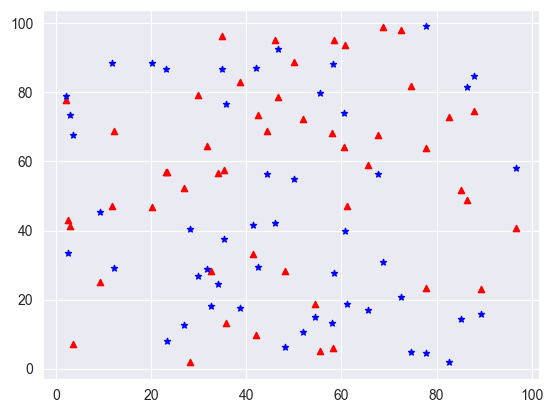

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
# np.random.seed(19680801)

x = np.random.random(50)*100
y = np.random.random(50)*100
z = np.random.random(50)*100
# print(x)
plt.scatter(x, y, s=20, marker='^', c='red')
plt.scatter(x, z, s=20, marker='*', c='blue')

plt.show()

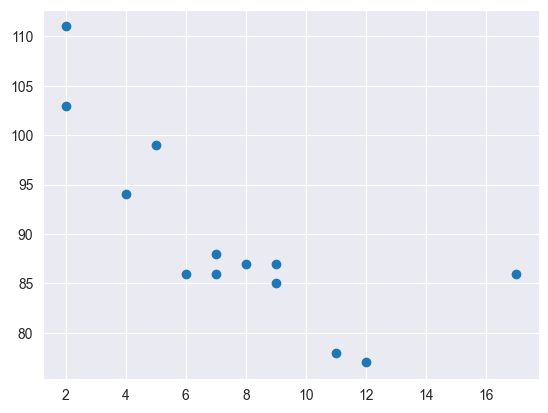

In [3]:
x = [5, 7, 8, 7, 2, 17, 2, 9, 4, 11, 12, 9, 6]
y = [99, 86, 87, 88, 111, 86, 103, 87, 94, 78, 77, 85, 86]

plt.scatter(x, y)
plt.show()

# 2. Line plots


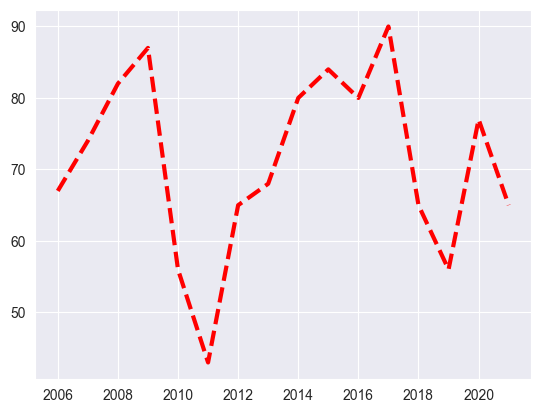

In [4]:
years = [2006 + x for x in range(16)]
birth = [67, 74, 82, 87, 56, 43, 65, 68,
         80, 84, 80, 90, 65, 56, 77, 65
        ]
plt.plot(years, birth, 'r--', lw=3)

## Plot customization details

In [ ]:
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)
years = [2006 + x for x in range(16)]
income = [670, 742, 829, 872, 561, 434, 656, 682,
         801, 840, 809, 905, 657, 566, 773, 651
        ]


income_ticks = list(range(400, 1000, 200))
plt.plot(years, income, 'g')

plt.xlabel('Years')  
plt.ylabel('Yearly income')  
# plt.xticks(years)
plt.yticks(income_ticks, [f'${x}K' for x in income_ticks])
  
# displaying the title 
plt.title("Income by year")


plt.show() 
# plt.savefig('income.png')

In [ ]:
t = np.arange(0.0, 5.0, 0.2)
plt.plot(t, t,  t, t**2,  t, t**3)
plt.show()

In [ ]:
t = np.arange(0.0, 5.0, 0.2)
plt.plot(t, t, 'g^', t, t**2, 'b--', t, t**3, 'r:')
plt.show()

## mix of plots

Most plotting happens on an `Axes`.  Therefore, if you're plotting something on an axes, then you'll use one of its methods.

let's focus on two methods: `plot` and `scatter`.

`plot` draws points with lines connecting them.  `scatter` draws unconnected points, optionally scaled or colored by additional variables.

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot([1, 2, 3, 4], [10, 20, 25, 30], color='lightblue', linewidth=3)
ax.scatter([0.3, 3.8, 1.2, 2.5], [11, 25, 9, 26], c=[1, 2, 3, 5], marker='^')
ax.set_xlim(0.5, 4.5)
plt.show()

## Axes methods vs. pyplot

Interestingly, just about all methods of an *Axes* object exist as a function in the *pyplot* module (and vice-versa). For example, when calling `plt.xlim(1, 10)`, *pyplot* calls `ax.set_xlim(1, 10)` on whichever *Axes* is "current". Here is an equivalent version of the above example using just pyplot.

In [ ]:
plt.plot([1, 2, 3, 4], [10, 20, 25, 30], color='lightblue', linewidth=3)
plt.scatter([0.3, 3.8, 1.2, 2.5], [11, 25, 9, 26], c=[1, 2, 3, 5], marker='^')
plt.xlim(0.5, 4.5)
plt.show()

While very simple plots, with short scripts would benefit from the conciseness of the pyplot implicit approach, when doing more complicated plots, or working within larger scripts, you will want to explicitly pass around the *Axes* and/or *Figure* object to operate upon.

The advantage of keeping which axes we're working with very clear in our code will become more obvious when we start to have multiple axes in one figure.

### Multiple Axes

We've mentioned before that a figure can have more than one `Axes` on it.  If you want your axes to be on a regular grid system, then it's easiest to use `plt.subplots(...)` to create a figure and add the axes to it automatically.

For example:

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2)
plt.show()

`plt.subplots(...)` created a new figure and added 4 subplots to it.  The `axes` object that was returned is a 2D numpy object array.  Each item in the array is one of the subplots.  They're laid out as you see them on the figure.  

Therefore, when we want to work with one of these axes, we can index the `axes` array and use that item's methods.

For example:

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2)
axes[0,0].set(title='Upper Left')
axes[0,1].set(title='Upper Right')
axes[1,0].set(title='Lower Left')
axes[1,1].set(title='Lower Right')

# To iterate over all items in a multidimensional numpy array, use the `flat` attribute
for ax in axes.flat:
    # Remove all xticks and yticks...
    ax.set(xticks=[], yticks=[])
    
plt.show()

One really nice thing about `plt.subplots()` is that when it's called with no arguments, it creates a new figure with a single subplot. 

Any time you see something like

```
fig = plt.figure()
ax = fig.add_subplot(111)
```

You can replace it with:

```
fig, ax = plt.subplots()
```

We'll be using that approach for the rest of the examples.  It's much cleaner.  

However, keep in mind that we're still creating a figure and adding axes to it.  When we start making plot layouts that can't be described by `subplots`, we'll go back to creating the figure first and then adding axes to it one-by-one.

# 3. Bar plots

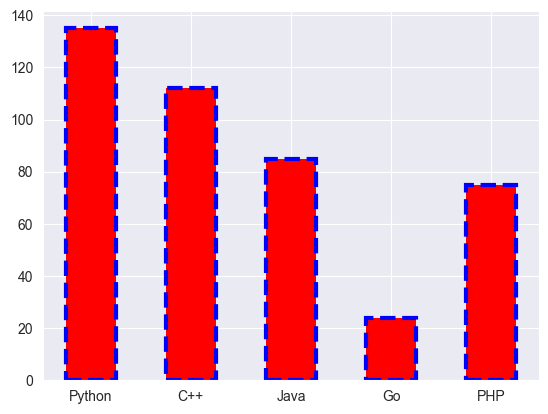

In [5]:
x = ['Python', 'C++', "Java", 'Go', 'PHP']
y = [135, 112, 85, 24, 75]
plt.bar(x, y, color='r', width=0.5, edgecolor='b', lw=3, ls='--')
plt.show()

In [ ]:
np.random.seed(1)
x = np.arange(5)
y = np.random.randn(5)
x = ['Python', 'C++', "Java", 'Go', 'PHP']
y = [135, 112, 85, 24, 75]
# y = [5, -3, 12, 2, -1]
# 
fig, axes = plt.subplots(ncols=2, figsize=plt.figaspect(1/2))
# fig, axes = plt.subplots(ncols=2, figsize=(10,8))

vert_bars = axes[0].bar(x, y, color='lightblue', align='center')
horiz_bars = axes[1].barh(x, y, color='lightblue', align='center')

axes[0].axhline(0, color='gray', linewidth=2)
axes[1].axvline(0, color='gray', linewidth=2)

plt.show()

# 4. histograms

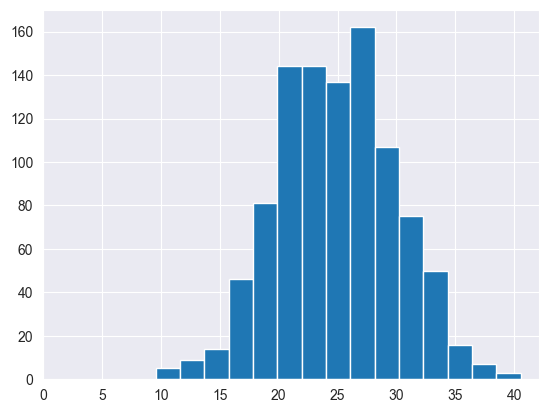

In [6]:
ages = np.random.normal(25, 5, 1000)
plt.hist(ages, bins=15)
plt.xticks(np.arange(0,45, 5))
plt.show()

# 5. pie chart

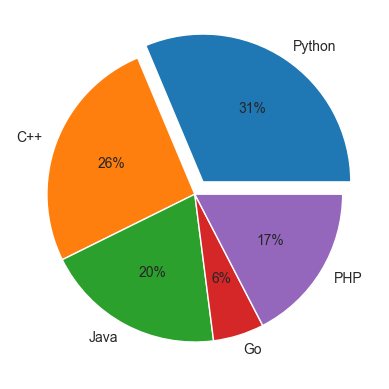

In [7]:
languages = ['Python', 'C++', "Java", 'Go', 'PHP']
votes = [135, 112, 85, 24, 75]
explode = [0.1, 0, 0, 0, 0]
plt.pie(votes, labels=languages, autopct='%0.f%%', explode=explode)
plt.show()

# 6. box plot

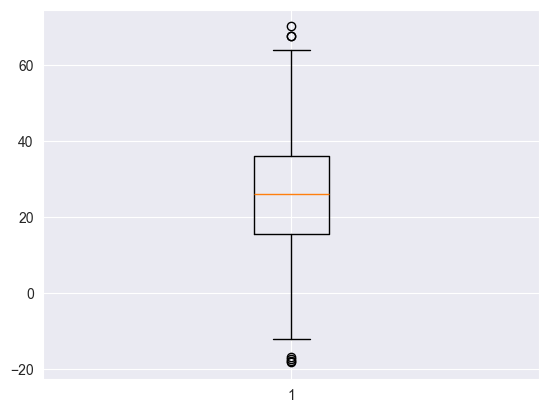

In [8]:
ages = np.random.normal(25, 15, 1000)
plt.boxplot(ages)
plt.show()

# # ანსკომბეს ოთხეული - Anscombe's quartet in Python
The Anscombe dataset can be loaded from seaborn using the load_dataset() package. We'll call up pandas as well and check out the dataset:

In [ ]:
import seaborn as sns
import pandas as pd
anscombe = sns.load_dataset('anscombe')
anscombe.head()

In [ ]:
anscombe.shape

The crux of Anscombe's quartet is this: we have four sets of data (grouped by the dataset column) of x and y values. We want to explore and compare these groups. We can do that broadly speaking in two ways: we can summarize or visualize it.

# Summarize the dataset
Let's start with summary statistics, which can be done with the describe() method from pandas. Because we're interested in comparing the four groups, we'll group the data by dataset first:

In [ ]:
anscombe.groupby('dataset').describe()

Notice many differences? Probably not. It looks like these groups are very similar.

Of course, these are very small samples we're talking here (n = 11 in each group), so if your data spidey sense is tingling, it's not wrong.

To really blow your mind, let's visualize this data. We'll use a scatterplot to visualize the x-y relationship of each group. This can be done with the scatterplot() function from seaborn:

In [ ]:
sns.scatterplot(data=anscombe, x='x', y='y', hue='dataset')

In [ ]:
# Show the results of a linear regression within each dataset
sns.lmplot(
    data=anscombe, x="x", y="y", col="dataset", hue="dataset",
    col_wrap=2, palette="muted", ci=None,
    height=4, scatter_kws={"s": 50, "alpha": 1}
)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

datasets = {
    'I': (x, y1),
    'II': (x, y2),
    'III': (x, y3),
    'IV': (x4, y4)
}

fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(6, 6),
                        gridspec_kw={'wspace': 0.08, 'hspace': 0.08})
axs[0, 0].set(xlim=(0, 20), ylim=(2, 14))
axs[0, 0].set(xticks=(0, 10, 20), yticks=(4, 8, 12))

for ax, (label, (x, y)) in zip(axs.flat, datasets.items()):
    ax.text(0.1, 0.9, label, fontsize=20, transform=ax.transAxes, va='top')
    ax.tick_params(direction='in', top=True, right=True)
    ax.plot(x, y, 'o')

    # linear regression
    p1, p0 = np.polyfit(x, y, deg=1)  # slope, intercept
    ax.axline(xy1=(0, p0), slope=p1, color='r', lw=2)

    # add text box for the statistics
    stats = (f'$\\mu$ = {np.mean(y):.2f}\n'
             f'$\\sigma$ = {np.std(y):.2f}\n'
             f'$r$ = {np.corrcoef(x, y)[0][1]:.2f}')
    bbox = dict(boxstyle='round', fc='blanchedalmond', ec='orange', alpha=0.5)
    ax.text(0.95, 0.07, stats, fontsize=9, bbox=bbox,
            transform=ax.transAxes, horizontalalignment='right')

plt.show()

# Interactive Data Visualization in Python

In [ ]:
from __future__ import print_function
# Turning on notebook plots -- just for use in jupyter notebooks.
import matplotlib
matplotlib.use('nbagg')
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
t = np.arange(0.0, 5.0, 0.2)
plt.plot(t, t,  t, t**2,  t, t**3)
plt.show()

In [ ]:
import matplotlib
print(matplotlib.__version__)
print(matplotlib.get_backend())

If you are working interactively at an (I)python prompt, the GUI framework is not critical (mostly aesthetic) however when working in Jupyter we need to pick a backend that integrates with Jupyter (javascript) framework.

To select the backend use ``matplotlib.use("backend_name")``, in this case we want ``'nbagg'``


https://matplotlib.org/stable/users/explain/figure/backends.html#backends

In [ ]:
matplotlib.use('nbagg')
print(matplotlib.get_backend())

which must be done *before* you `import matplotlib.pyplot as plt`.

You can also set the backend via an 'ipython magic' ``%matplotlib backend_name``.  In addition to setting the backend, the magic also calls `plt.ion()`, which puts Matplotlib in 'interacitve mode' (the inverse is `plt.ioff()`).  In 'interactive mode' figures are shown (injected into the web page in the notebook) as soon as they are created.  Otherwise, figures are not shown until you explicitly call `plt.show()`.


In these tutorials we will mostly work in non-interactive mode for better control of when
figures are shown in the notebooks.
This also better mimics the behavior you can expect in regular python scripts.
